In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Журавлев К. В. ПИ20-1 Лабораторная работа 7 

**Задание 1**

Загрузите данные о диагностике сахарного диабета;

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


**Задание 2**

Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
Y = pima.label
X = pima.drop(['label'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=True)


In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
(y_test == y_pred).sum()

120

**Задание 3**

Постройте модель классификации для определения заболевания;

In [ ]:
cls = LogisticRegression(max_iter = 200)
cls.fit(x_train, y_train)

LogisticRegression(max_iter=200)

Text(0.5, 15.0, 'Предсказанные значения')

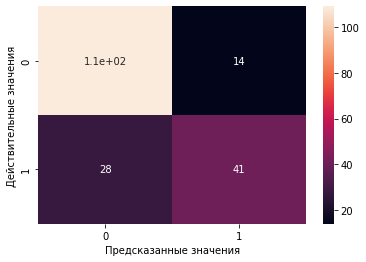

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred = cls.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[109,  14],
       [ 28,  41]])

In [ ]:

y_pred = cls.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_test_std = sc.transform(x_test)

In [ ]:
cls.predict_proba([X_test_std[0, :]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[9.99532359e-01, 4.67641427e-04]])

In [ ]:
cls.predict_proba(X)


array([[0.31061236, 0.68938764],
       [0.95402976, 0.04597024],
       [0.19061664, 0.80938336],
       ...,
       [0.81747298, 0.18252702],
       [0.71206878, 0.28793122],
       [0.93010065, 0.06989935]])

**Задание 4**

Оцените качество модели на тестовой выборке с помощью следующих метрик

Достоверность предсказания

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

Accuracy = (TN + TP)/(TN + FP + TP + FN)

Точность

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label="1")

0.7560975609756098

Precision = TP / (TP + FP)

Полнота

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label="1")

0.5636363636363636

Recall = TP / (TP + FN)